In [143]:
import h5py
import xarray as xr
import glob
import matplotlib.pyplot as plt

In [83]:
path = '/Volumes/arc_01/horganhu/ICESAT/GLA12_633_TRACKS/track1275_processed.mat'
# track1 = '/Volumes/arc_01/horganhu/ICESAT/GLA12_633_TRACKS/track1275_processed.mat'

In [69]:
#work out the structure of the h5 file. .mat is actually h5
with h5py.File(path, 'r') as f:
    gs = list(f.keys())
    print(gs)
    for g in gs:
        print(g,': ',list(f[g].keys()))
        hs = list(f[g].keys())
        for h in hs:
            print(h,': ',list(f[g][h].keys()))
#             js = list(f[g][h].keys())
#             for j in js:
#                 print(j,': ',list(f[g][h][j].keys()))

['antarctica']
antarctica :  ['track1331']
track1331 :  ['DEMhiresArElv', 'DEMhiresGradX', 'DEMhiresGradY', 'IceSVar', 'Surface_pres', 'UTCTime', 'delta_h', 'ecefx', 'ecefy', 'ecefz', 'elev', 'elev_wgs84_retide', 'elev_wgs84_tpxtide', 'elev_wgs84_tpxtide_ibe', 'gdHT', 'gval_rcv', 'ibe', 'lat', 'ldElv', 'lon', 'ocElv', 'psx', 'psy', 'rec_ndx', 'reflCor', 'reflctUC', 'satCorrFlg', 'satElevCorr', 'sdatedays', 'tpxo62_load', 'tpxo71_z']


- 'DEMhiresArElv', 
- 'DEMhiresGradX', 
- 'DEMhiresGradY', 
- 'IceSVar', 
- 'Surface_pres', 
- 'UTCTime', 
- 'delta_h', 
- 'ecefx', 
- 'ecefy', 
- 'ecefz', 
- 'elev', 
- 'elev_wgs84_retide', Retide is huws tide correction done
- 'elev_wgs84_tpxtide', 
- 'elev_wgs84_tpxtide_ibe', 
- 'gdHT', 
- 'gval_rcv', 
- 'ibe', 
- 'lat', 
- 'ldElv', '
- lon', 
- 'ocElv', 
- 'psx', 
- 'psy', 
- 'rec_ndx', 
- 'reflCor', 
- 'reflctUC', 
- 'satCorrFlg', 
- 'satElevCorr', 
- 'sdatedays', 
- 'tpxo62_load', 
- 'tpxo71_z'

In [137]:
def icesat1todataframe(track):
    """
    this function will import the .mat and arrange into a dataframe
    track = eg track
    """
    
    
    
    path = f'/Volumes/arc_01/horganhu/ICESAT/GLA12_633_TRACKS/{track}_processed.mat'
    df = pd.DataFrame({'x':[],
                       'pass_num':[],
                      })
    psys = []
    h = []
    time = []
    dh = []

    with h5py.File(path, 'r') as f:
        #add x location
        psx_l = list(f['antarctica'][track]['psx'])
        for p in psx_l:
            df_temp = pd.DataFrame({'x': list(f['antarctica'][track]['psx'][p][0]),
                                    'pass_num': [p]*len(list(f['antarctica'][track]['psx'][p])[0]) })
            df = df.append(df_temp , ignore_index=True )

        #add y location
        psy_l = list(f['antarctica'][track]['psy'])
        for p in psy_l:
            psys.extend( list(f['antarctica'][track]['psy'][p][0]) )

        #add height
        h_l = list(f['antarctica'][track]['elev_wgs84_retide'])
        for p in h_l:
            h.extend( list(f['antarctica'][track]['elev_wgs84_retide'][p][0]) )

        #add time
        t_l = list(f['antarctica'][track]['UTCTime'])
        for p in t_l:
            time.extend( list(f['antarctica'][track]['UTCTime'][p][0]) )

        #add delta_h (not sure what it is)
        dh_l = list(f['antarctica'][track]['delta_h'])
        for p in dh_l:
            dh.extend( list(f['antarctica'][track]['delta_h'][p][0]) )

    df['y'] = psys
    df['h'] = h
    df['time'] = time
    df['delta_h'] = dh

    da = df.query("x > -382064.5722209641 & x < -374781.1654740692 & y > -734075.0820404041 & y < -722764.4514729496")
    da.reset_index(drop=True,inplace=True)
    return da

In [117]:
#all the paths of relevant .mat icesat1 files
paths = glob.glob('/Volumes/arc_01/horganhu/ICESAT/GLA12_633_TRACKS/*_processed.mat')
tracks = [path[49:58] for path in paths]

In [123]:
#trying to find the right track, which has more points over the channel
lengths = []
for track in tracks:
    df = icesat1todataframe(track) 
    lengths.append(df.shape[0])
    print(track,df.shape[0])
    del df


track0015 0
track1331 68
track0043 0
track0197 68
track1303 68
track0351 68
track0057 0
track0407 68
track0155 68
track0127 68
track0183 68
track0365 68
track0337 68
track0099 753
track0295 68
track0323 68
track0211 549
track0113 68
track0379 68
track0085 193
track0267 68
track0071 0
track0169 68
track1289 68
track0029 0
track1345 68
track0239 68
track1275 68
track0225 68
track0001 0
track0393 68
track0141 68
track0253 68
track0309 68
track1317 68
track0281 68


In [138]:
#found one
df = icesat1todataframe('track0099')

In [141]:
df.pass_num.value_counts()

psxPass13    68
psxPass16    68
psxPass15    68
psxPass23    68
psxPass17    68
psxPass22    67
psxPass10    67
psxPass20    67
psxPass8     67
psxPass21    67
psxPass14    67
psxPass11    11
Name: pass_num, dtype: int64

In [172]:
#one rogue value
df.drop([281],inplace=True)

(-378600, -377200)

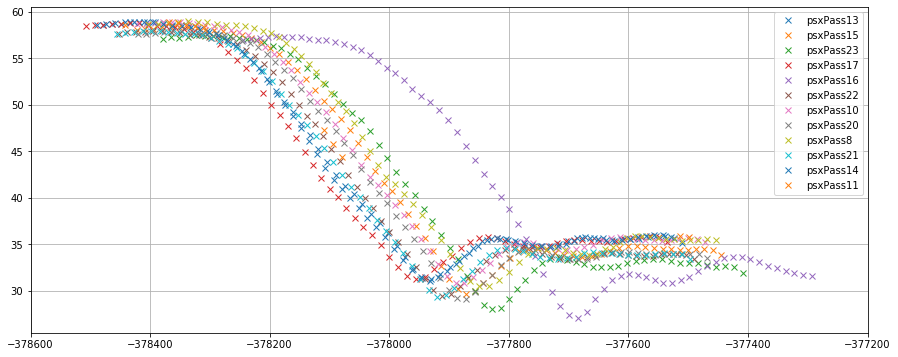

In [179]:
#plot the lines
plt.figure(figsize=(15,6))
for pas in df.pass_num.value_counts().index.tolist():
    dl = df[df.pass_num==pas]
    plt.plot(dl.x,dl.h,'x',label=pas)
plt.legend()
plt.grid()
plt.xlim([-378600, -377200])
    

(-600, 500)

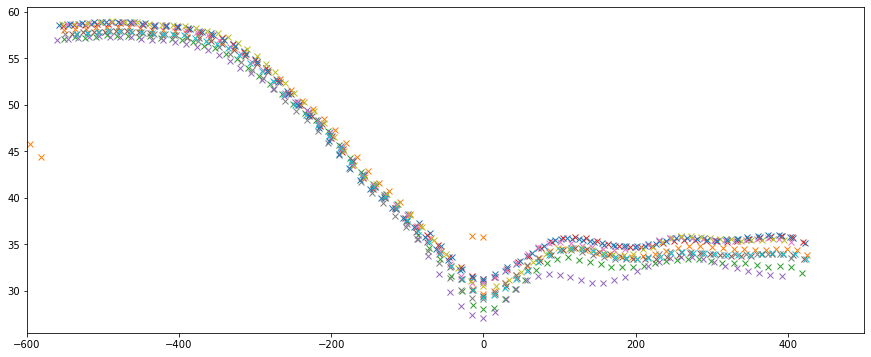

In [180]:
#try and align them at the minimum
plt.figure(figsize=(15,6))
for pas in df.pass_num.value_counts().index.tolist():
    dl = df[df.pass_num==pas]
    min_i = dl.h.to_numpy().argmin()
    min_x = dl.x.iloc[min_i]
    plt.plot(dl.x.to_numpy() - min_x,dl.h,'x',label=dl.time.mean())
plt.xlim([-600, 500])


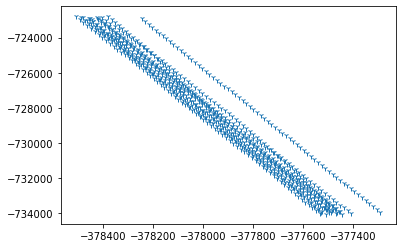

In [182]:
plt.plot(df.x,df.y,'1')

In [30]:
for o in obj:
    print(o.split()[0])
#     print(o.split()[0].split('/')[1:])

/
/antarctica
/antarctica/track1331
/antarctica/track1331/DEMhiresArElv
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass1
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass10
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass11
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass12
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass13
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass14
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass15
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass16
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass17
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass18
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass19
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass2
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass20
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass21
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass22
/antarctica/track1331/DEMhiresArElv/DEMhiresArElvPass23
/antarctica/track1331/DEMhiresArEl

In [27]:
psx['psxPass1'][0].min()

-1828903.1190699642

In [31]:
import pandas as pd

pd.read_hdf(path,'/antarctica/track1331/psx/psxPass1')

TypeError: cannot create a storer if the object is not existing nor a value are passed